# CCEM/CALM Image Tutorial #5

## Introduction to Fourier filtering

In [ ]:
# To run only if using jupyter notebook through binder
# Install the required packages in Jupyter kernel (internet connection required)

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-image

In [1]:
# Libraries from tutorial #1
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

# Library from tutorial #2
import skimage.filters as filters

# New library
from matplotlib.colors import LogNorm

Links to libraries documentation

1. Numpy ==> <https://numpy.org/doc/stable/reference/index.html>
2. imageio ==> <https://imageio.readthedocs.io/en/stable/reference/userapi.html>
3. matplotlib.pyplot ==> <https://matplotlib.org/stable/api/pyplot_summary.html>
4. scikit-image ==> <https://scikit-image.org/docs/stable/api/api.html>
5. matplotlib.colors ==> <https://matplotlib.org/stable/api/colors_api.html>

In [2]:
%matplotlib notebook

## Denoising with Fourier filtering

In [3]:
image_si = io.imread('STEM_Si.tif')

<IPython.core.display.Javascript object>


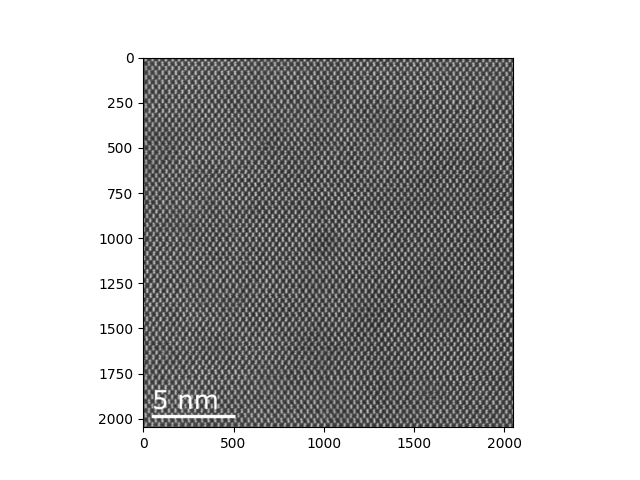

In [4]:
fig_si, ax_si = plt.subplots()
ax_si.imshow(image_si, cmap='gray')

plt.show()

In [5]:
fft_si = np.fft.fft2(image_si)
fft_si_shifted = np.fft.fftshift(fft_si)

<IPython.core.display.Javascript object>


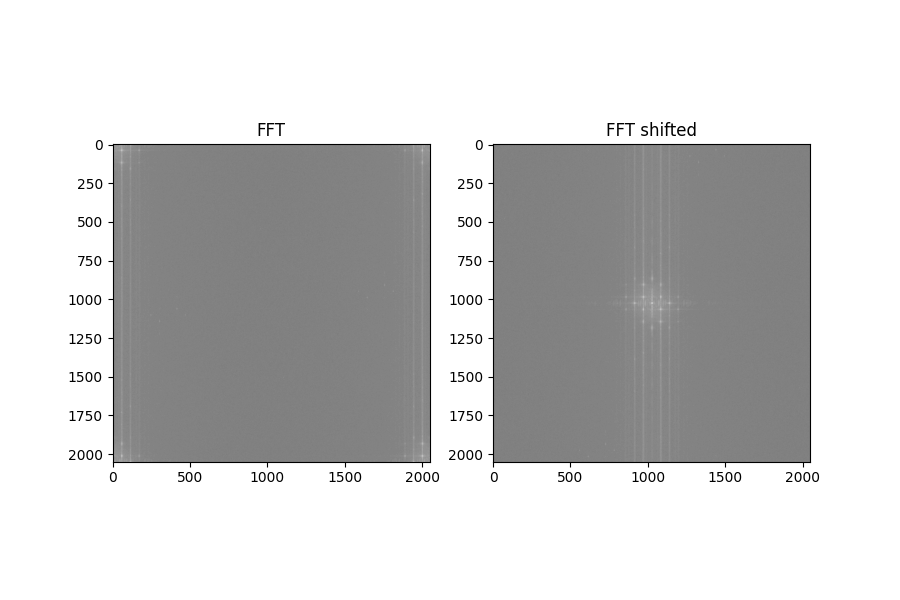

In [7]:
fig_si_fft, ax_si_fft = plt.subplots(1, 2, figsize=(9, 6))
ax_si_fft[0].imshow(np.abs(fft_si), cmap='gray', norm=LogNorm())
ax_si_fft[1].imshow(np.abs(fft_si_shifted), cmap='gray', norm=LogNorm())

ax_si_fft[0].set_title('FFT')
ax_si_fft[1].set_title('FFT shifted')

plt.show()

In [8]:
x = np.linspace(0, 2047, 2048)
y = np.linspace(0, 2047, 2048)

xx, yy = np.meshgrid(x, y)

In [9]:
print('xx = ', xx)
print('yy = ', yy)

xx =  [[0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]
 [0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]
 [0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]
 ...
 [0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]
 [0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]
 [0.000e+00 1.000e+00 2.000e+00 ... 2.045e+03 2.046e+03 2.047e+03]]
yy =  [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 2.000e+00 2.000e+00]
 ...
 [2.045e+03 2.045e+03 2.045e+03 ... 2.045e+03 2.045e+03 2.045e+03]
 [2.046e+03 2.046e+03 2.046e+03 ... 2.046e+03 2.046e+03 2.046e+03]
 [2.047e+03 2.047e+03 2.047e+03 ... 2.047e+03 2.047e+03 2.047e+03]]


In [10]:
def circle_2d(radius, center_x, center_y, grid_x, grid_y):
    mask_inside = ( (grid_x - center_x) ** 2 + (grid_y - center_y) ** 2 ) <= radius ** 2
    mask_circle = np.zeros(grid_x.shape)
    mask_circle[mask_inside] = 1
    return mask_circle

In [11]:
def gaussian_2d(A, center_x, center_y, sigma, grid_x, grid_y):
    return A * np.exp( - ( ( (grid_x - center_x) ** 2 + (grid_y - center_y) ** 2) / ( sigma ** 2 ) ))

In [12]:
mask_circle = circle_2d(300, 1024, 1024, xx, yy)
mask_gaussian = gaussian_2d(1, 1024, 1024,  300, xx, yy)

fft_si_mask_circle = mask_circle * fft_si_shifted 
fft_si_mask_gaussian = mask_gaussian * fft_si_shifted

fft_si_mask_gaussian_circle = mask_circle * mask_gaussian * fft_si_shifted 

<IPython.core.display.Javascript object>


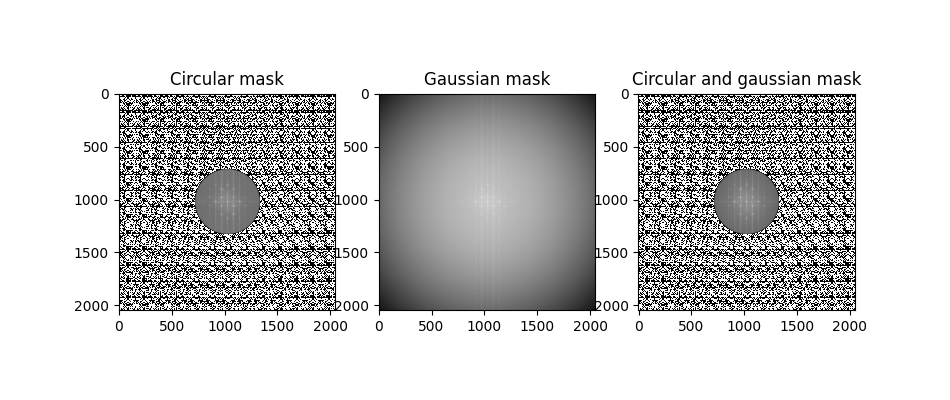

In [13]:
fig_si_fft_mask, ax_si_fft_mask = plt.subplots(1, 3, figsize=(9.5, 4))
ax_si_fft_mask[0].imshow(np.abs(fft_si_mask_circle), cmap='gray', norm=LogNorm())
ax_si_fft_mask[1].imshow(np.abs(fft_si_mask_gaussian), cmap='gray', norm=LogNorm())
ax_si_fft_mask[2].imshow(np.abs(fft_si_mask_gaussian_circle), cmap='gray', norm=LogNorm())

ax_si_fft_mask[0].set_title('Circular mask')
ax_si_fft_mask[1].set_title('Gaussian mask')
ax_si_fft_mask[2].set_title('Circular and gaussian mask')

plt.show()

In [14]:
image_si_filtered_circle = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle))
image_si_filtered_gaussian = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_gaussian))
image_si_filtered_gaussian_circle = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_gaussian_circle))

<IPython.core.display.Javascript object>


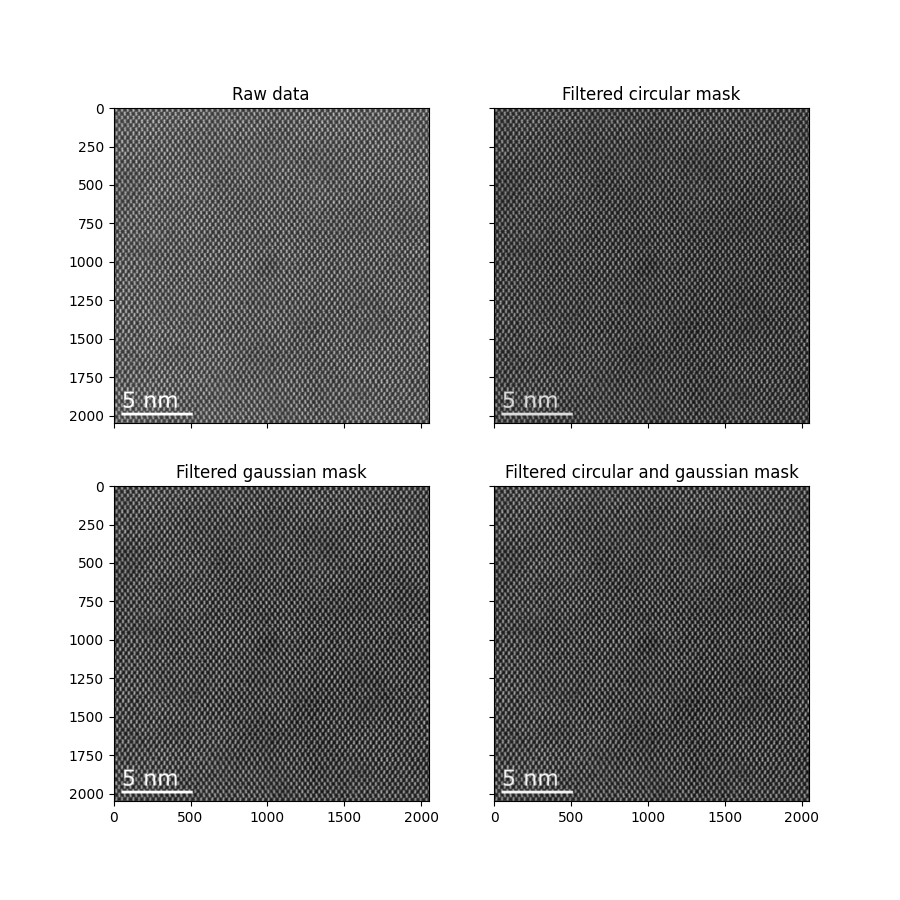

In [15]:
fig_filtered, ax_filtered = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)
ax_filtered[0, 0].imshow(image_si, cmap='gray')
ax_filtered[0, 1].imshow(np.real(image_si_filtered_circle), cmap='gray')
ax_filtered[1, 0].imshow(np.real(image_si_filtered_gaussian), cmap='gray')
ax_filtered[1, 1].imshow(np.real(image_si_filtered_gaussian_circle), cmap='gray')

ax_filtered[0, 0].set_title('Raw data')
ax_filtered[0, 1].set_title('Filtered circular mask')
ax_filtered[1, 0].set_title('Filtered gaussian mask')
ax_filtered[1, 1].set_title('Filtered circular and gaussian mask')

plt.show()

In [16]:
mask_circle_smoothed = filters.gaussian(mask_circle, sigma=[20, 20], preserve_range=True)
fft_si_mask_circle_smoothed = mask_circle_smoothed * fft_si_shifted
image_si_filtered_circle_smoothed = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_smoothed))

<IPython.core.display.Javascript object>


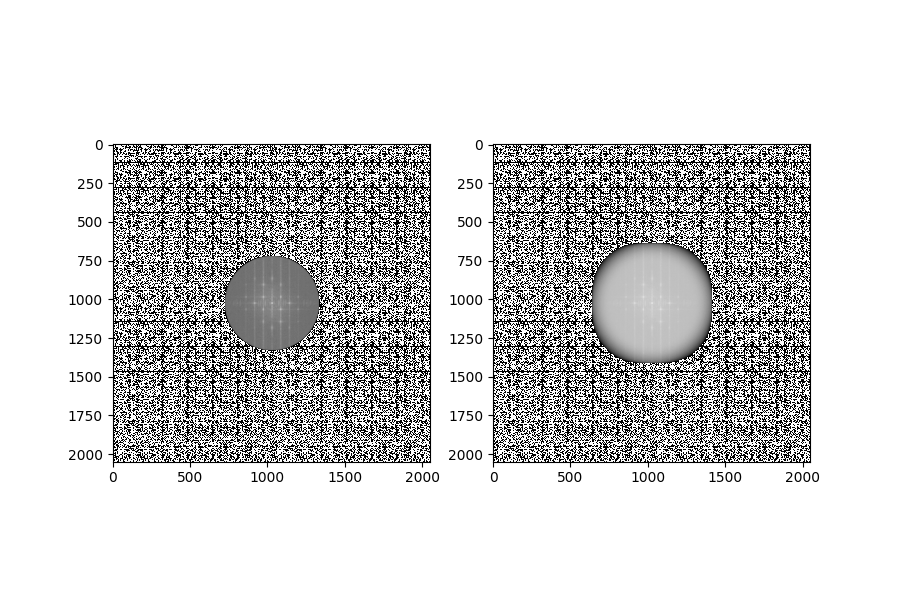

In [19]:
fig_si_fft_mask_smoothed, ax_si_fft_mask_smoothed = plt.subplots(1, 2, figsize=(9, 6))
ax_si_fft_mask_smoothed[0].imshow(np.abs(fft_si_mask_circle), cmap='gray', norm=LogNorm())
ax_si_fft_mask_smoothed[1].imshow(np.abs(fft_si_mask_circle_smoothed), cmap='gray', norm=LogNorm())

plt.show()

<IPython.core.display.Javascript object>


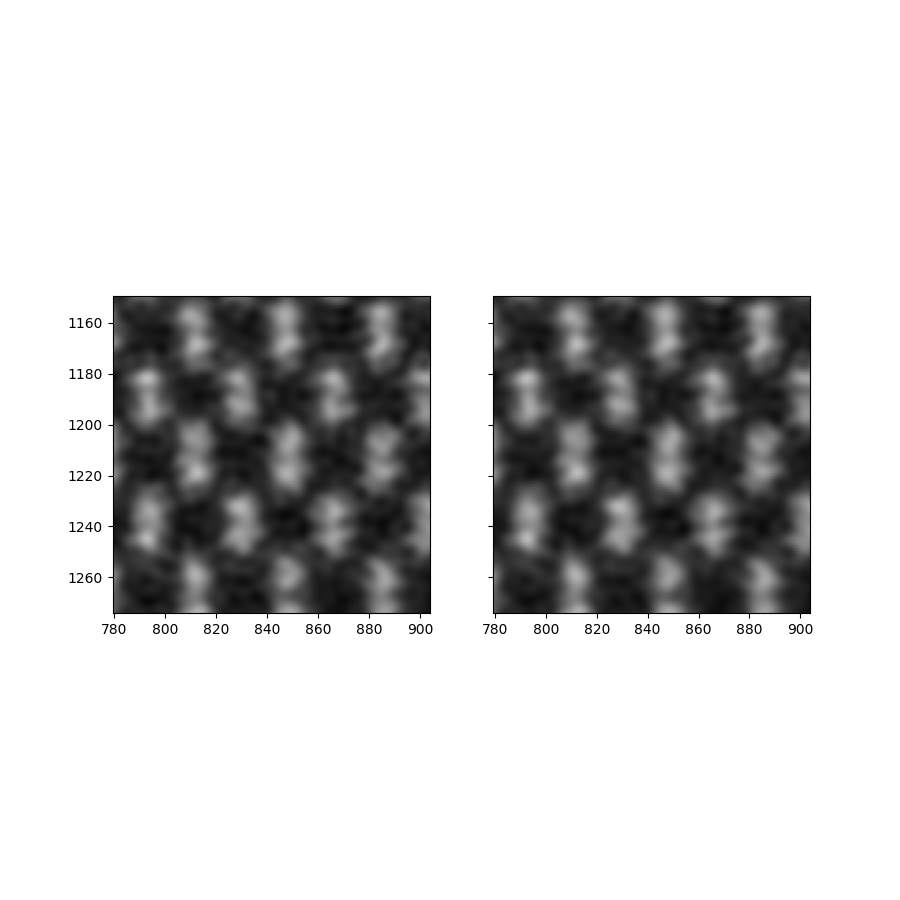

In [20]:
fig_filtered_smoothed, ax_filtered_smoothed = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)
ax_filtered_smoothed[0].imshow(np.real(image_si_filtered_circle), cmap='gray')
ax_filtered_smoothed[1].imshow(np.real(image_si_filtered_circle_smoothed), cmap='gray')

plt.show()

## Lattice fringes separation

In [21]:
image_inp = io.imread('STEM_InP_111.tif')

In [22]:
fft_inp = np.fft.fft2(image_inp)
fft_inp_shifted = np.fft.fftshift(fft_inp)

<IPython.core.display.Javascript object>


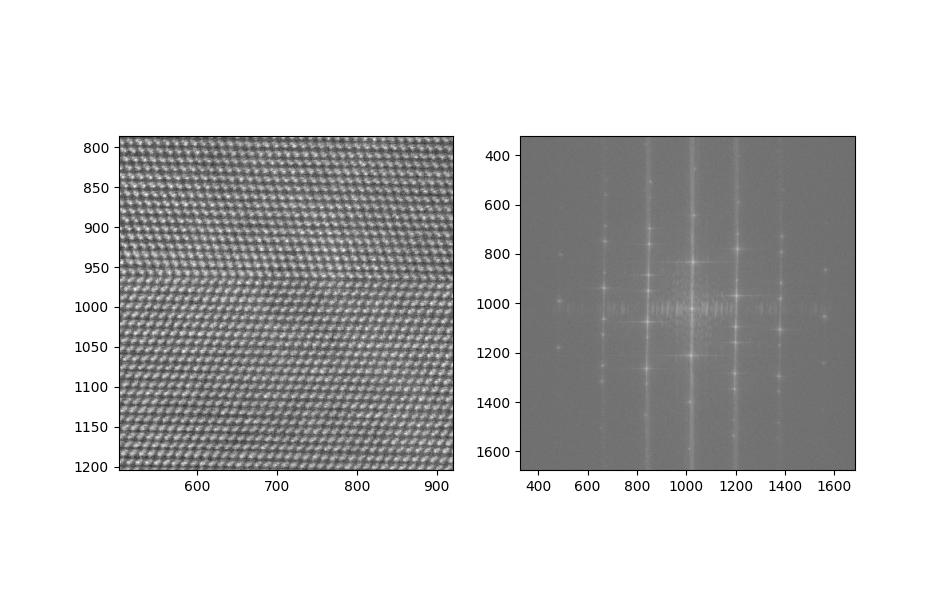

In [23]:
fig_inp_fft, ax_inp_fft = plt.subplots(1, 2, figsize=(9.5, 6))
ax_inp_fft[0].imshow(image_inp, cmap='gray')
ax_inp_fft[1].imshow(np.abs(fft_inp_shifted), cmap='gray', norm=LogNorm())

plt.show()

In [25]:
mask_circle_111 = circle_2d(30, 1028, 834, xx, yy)
mask_circle_11bar1_a = circle_2d(30, 1204, 971, xx, yy)
mask_circle_11bar1_b = circle_2d(30, 1205, 908, xx, yy)
mask_circle_002_a = circle_2d(30, 848, 888, xx, yy)
mask_circle_002_b = circle_2d(30, 847, 951, xx, yy)

In [26]:
fft_si_mask_circle_111 = mask_circle_111 * fft_inp_shifted
fft_si_mask_circle_11bar1_a = mask_circle_11bar1_a * fft_inp_shifted
fft_si_mask_circle_11bar1_b = mask_circle_11bar1_b * fft_inp_shifted
fft_si_mask_circle_002_a = mask_circle_002_a * fft_inp_shifted
fft_si_mask_circle_002_b = mask_circle_002_b * fft_inp_shifted 

<IPython.core.display.Javascript object>


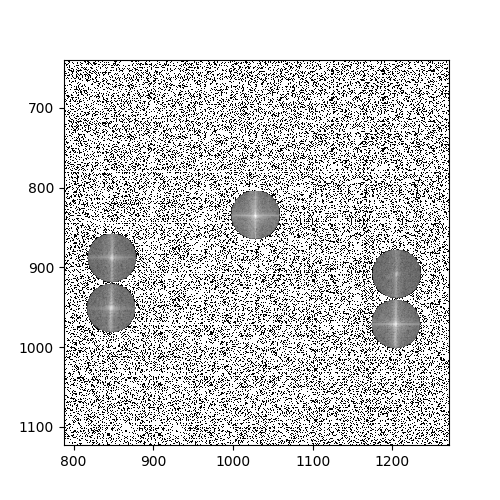

In [27]:
fig_inp_fft_mask, ax_inp_fft_mask = plt.subplots(1, 1, figsize=(5, 5))
ax_inp_fft_mask.imshow(np.abs(fft_si_mask_circle_111)
                       + np.abs(fft_si_mask_circle_11bar1_a)
                       + np.abs(fft_si_mask_circle_11bar1_b)
                       + np.abs(fft_si_mask_circle_002_a) 
                       + np.abs(fft_si_mask_circle_002_b), cmap='gray', norm=LogNorm())

plt.show()

In [28]:
image_filtered_111 = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_111))
image_filtered_11bar1_a = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_11bar1_a))
image_filtered_11bar1_b = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_11bar1_b))
image_filtered_002_a = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_002_a))
image_filtered_002_b = np.fft.ifft2(np.fft.ifftshift(fft_si_mask_circle_002_b))

<IPython.core.display.Javascript object>


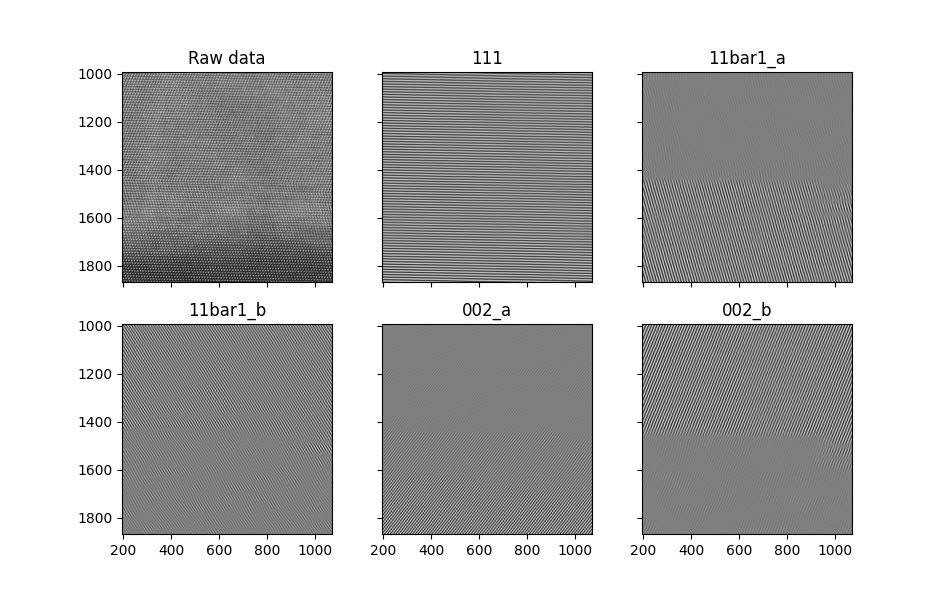

In [29]:
fig_filtered, ax_filtered = plt.subplots(2, 3, figsize=(9.5, 6), sharex=True, sharey=True)
ax_filtered[0, 0].imshow(image_inp, cmap='gray')
ax_filtered[0, 1].imshow(np.real(image_filtered_111), cmap='gray')
ax_filtered[0, 2].imshow(np.real(image_filtered_11bar1_a), cmap='gray')
ax_filtered[1, 0].imshow(np.real(image_filtered_11bar1_b), cmap='gray')
ax_filtered[1, 1].imshow(np.real(image_filtered_002_a), cmap='gray')
ax_filtered[1, 2].imshow(np.real(image_filtered_002_b), cmap='gray')

ax_filtered[0, 0].set_title('Raw data')
ax_filtered[0, 1].set_title('111')
ax_filtered[0, 2].set_title('11bar1_a')
ax_filtered[1, 0].set_title('11bar1_b')
ax_filtered[1, 1].set_title('002_a')
ax_filtered[1, 2].set_title('002_b')

plt.show()

<IPython.core.display.Javascript object>


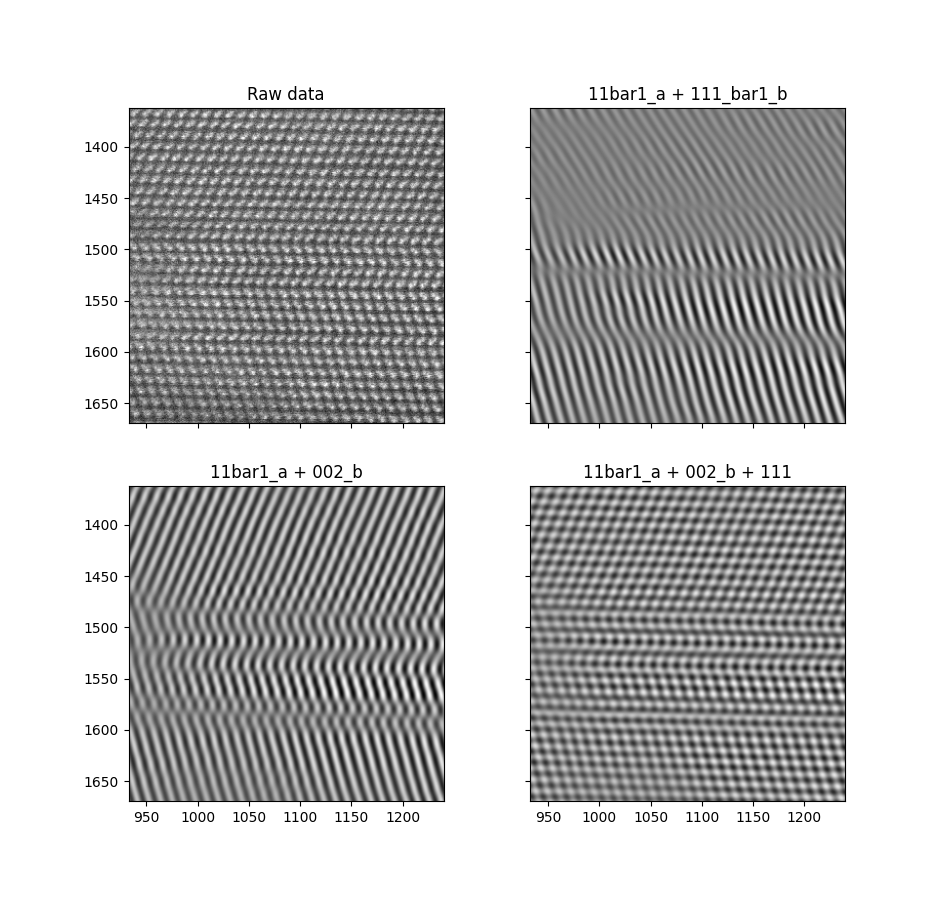

In [30]:
fig_filtered_comb, ax_filtered_comb = plt.subplots(2, 2, figsize=(9.5, 9), sharex=True, sharey=True)
ax_filtered_comb[0, 0].imshow(image_inp, cmap='gray')
ax_filtered_comb[0, 1].imshow(np.real(image_filtered_11bar1_a) + np.real(image_filtered_11bar1_b), cmap='gray')
ax_filtered_comb[1, 0].imshow(np.real(image_filtered_11bar1_a) + np.real(image_filtered_002_b), cmap='gray')
ax_filtered_comb[1, 1].imshow(np.real(image_filtered_11bar1_a) + np.real(image_filtered_002_b) + np.real(image_filtered_111), cmap='gray')

ax_filtered_comb[0, 0].set_title('Raw data')
ax_filtered_comb[0, 1].set_title('11bar1_a + 11_bar1_b')
ax_filtered_comb[1, 0].set_title('11bar1_a + 002_b')
ax_filtered_comb[1, 1].set_title('11bar1_a + 002_b + 111')

plt.show()

In [31]:
image_RGB = np.empty((0, 2048, 2048))
image_RGB = np.append(image_RGB, [np.real(image_filtered_11bar1_a)/(np.max(np.abs(np.real(image_filtered_11bar1_a)))) / 2 + 0.15], axis=0)
image_RGB = np.append(image_RGB, [np.real(image_filtered_002_b)/(np.max(np.abs(np.real(image_filtered_002_b)))) / 2 + 0.15], axis=0)
image_RGB = np.append(image_RGB, [np.real(image_filtered_111)/(np.max(np.abs(np.real(image_filtered_111)))) / 2 + 0.15], axis=0)

image_RGB = np.transpose(image_RGB, axes=(1, 2, 0))

<IPython.core.display.Javascript object>


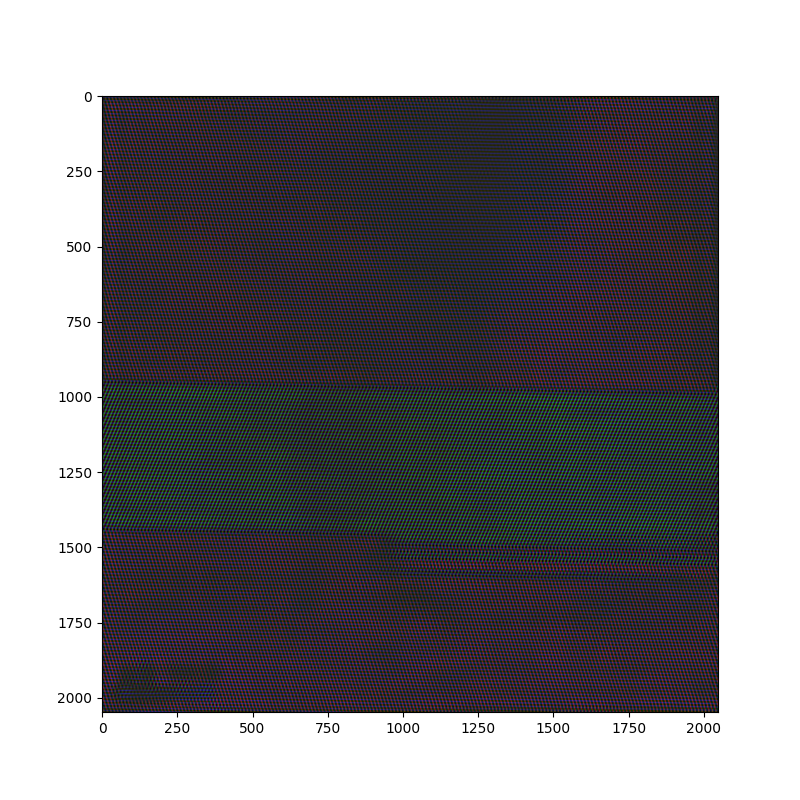

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [32]:
fig_RGB, ax_RGB = plt.subplots(1, 1, figsize=(8, 8))
ax_RGB.imshow(image_RGB)

plt.show()